## Read results files

In [1]:
from pathlib import Path
import re
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

In [2]:
res_re = re.compile(r'^.+/res\d+_\d+\.csv$')
res_files = (file for file in (Path('exports/').glob('res*.csv')) if res_re.match(str(file)))
dfs = []
for res_file in res_files:
    print(res_file)
    dfs.append(pd.read_csv(res_file, header=0))
res_df = pd.concat(dfs).sort_values(['nsrrid', 'study'])

exports/res180_200.csv
exports/res160_180.csv
exports/res100_120.csv
exports/res60_80.csv
exports/res320_340.csv
exports/res0_40.csv
exports/res80_100.csv
exports/res220_240.csv
exports/res140_160.csv
exports/res40_60.csv
exports/res280_300.csv
exports/res260_280.csv
exports/res300_320.csv
exports/res200_220.csv
exports/res120_140.csv
exports/res240_260.csv


In [3]:
res_df.head()

,nsrrid,filename,comment,orig_freq,duration_sec,sleep_seconds,hyp_apnea_seconds,asleep_non_event_seconds,time_in_async_25p,time_in_async_50p,time_in_async_75p,time_in_async_25p_wevents,time_in_async_50p_wevents,time_in_async_75p_wevents,invalid_taa_periods,study,arm,treatment
0,300001,baseline/chat-baseline-300001,success,128,32258,28650,247,28411,0.0140,0.0018,0.0008,0.0146,0.0019,0.0008,347,baseline,2,wait
1,300001,followup/chat-followup-300001,success,128,32684,25620,112,25508,0.1865,0.1700,0.1520,0.1875,0.1703,0.1518,997,followup,2,wait
2,300002,baseline/chat-baseline-300002,success,200,45349,29130,403,28727,0.0550,0.0079,0.0025,0.0547,0.0079,0.0026,439,baseline,2,wait
3,300002,followup/chat-followup-300002,success,200,36494,30600,611,30006,0.1603,0.0921,0.0670,0.1610,0.0910,0.0657,1269,followup,2,wait
4,300004,baseline/chat-baseline-300004,success,200,37545,27750,512,27247,0.2615,0.1455,0.0988,0.2661,0.1498,0.1007,634,baseline,1,surgery


## Export full csvs

In [4]:
res_df.columns

Index(['nsrrid', 'filename', 'comment', 'orig_freq', 'duration_sec',
       'sleep_seconds', 'hyp_apnea_seconds', 'asleep_non_event_seconds',
       'time_in_async_25p', 'time_in_async_50p', 'time_in_async_75p',
       'time_in_async_25p_wevents', 'time_in_async_50p_wevents',
       'time_in_async_75p_wevents', 'invalid_taa_periods', 'study', 'arm',
       'treatment'],
      dtype='object')

In [5]:
export_columns = ['nsrrid', 'time_in_async_25p', 'time_in_async_50p', 'time_in_async_75p',
       'time_in_async_25p_wevents', 'time_in_async_50p_wevents',
       'time_in_async_75p_wevents', 'study', 'arm',
       'treatment']
round_columns = ['time_in_async_25p', 'time_in_async_50p', 'time_in_async_75p',
       'time_in_async_25p_wevents', 'time_in_async_50p_wevents',
       'time_in_async_75p_wevents']

In [25]:
export_df = res_df[export_columns]
baseline_df = export_df[export_df.study == 'baseline'].drop(columns="study")
followup_df = export_df[export_df.study == 'followup'].drop(columns="study")

In [26]:
baseline_df.head()

,nsrrid,time_in_async_25p,time_in_async_50p,time_in_async_75p,time_in_async_25p_wevents,time_in_async_50p_wevents,time_in_async_75p_wevents,arm,treatment
0,300001,0.0140,0.0018,0.0008,0.0146,0.0019,0.0008,2,wait
2,300002,0.0550,0.0079,0.0025,0.0547,0.0079,0.0026,2,wait
4,300004,0.2615,0.1455,0.0988,0.2661,0.1498,0.1007,1,surgery
6,300007,0.0351,0.0056,0.0032,0.0354,0.0054,0.0031,1,surgery
8,300013,0.1252,0.0057,0.0022,0.1247,0.0054,0.0023,1,surgery


In [27]:
baseline_df.to_csv(f'exports/baseline_results.csv', header=True, index=False, float_format="%.4f")
followup_df.to_csv(f'exports/followup_results.csv', header=True, index=False, float_format="%.4f")

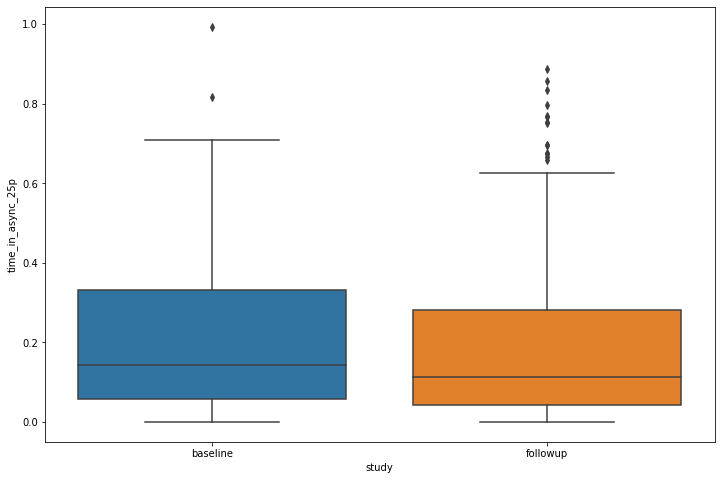

In [28]:
plt.figure(figsize=(12,8))
sns.boxplot(y='time_in_async_25p', x='study', data=res_df);

In [149]:
compare_cols = ['hyp_apnea_seconds', 'time_in_async_25p', 'time_in_async_50p', 'time_in_async_75p', 'time_in_async_25p_wevents', 'time_in_async_50p_wevents',
       'time_in_async_75p_wevents']
keep_cols = ['nsrrid','treatment'] + compare_cols
baseline_df = res_df[res_df.study == 'baseline'][keep_cols].set_index('nsrrid')
followup_df = res_df[res_df.study == 'followup'][keep_cols].set_index('nsrrid')

In [150]:
baseline_df.head()

,treatment,hyp_apnea_seconds,time_in_async_25p,time_in_async_50p,time_in_async_75p,time_in_async_25p_wevents,time_in_async_50p_wevents,time_in_async_75p_wevents
nsrrid,,,,,,,,
300001,wait,247,0.0140,0.0018,0.0008,0.0146,0.0019,0.0008
300002,wait,403,0.0550,0.0079,0.0025,0.0547,0.0079,0.0026
300004,surgery,512,0.2615,0.1455,0.0988,0.2661,0.1498,0.1007
300007,surgery,169,0.0351,0.0056,0.0032,0.0354,0.0054,0.0031
300013,surgery,254,0.1252,0.0057,0.0022,0.1247,0.0054,0.0023


In [151]:
followup_df.head()

,treatment,hyp_apnea_seconds,time_in_async_25p,time_in_async_50p,time_in_async_75p,time_in_async_25p_wevents,time_in_async_50p_wevents,time_in_async_75p_wevents
nsrrid,,,,,,,,
300001,wait,112,0.1865,0.1700,0.1520,0.1875,0.1703,0.1518
300002,wait,611,0.1603,0.0921,0.0670,0.1610,0.0910,0.0657
300004,surgery,41,0.0240,0.0051,0.0018,0.0241,0.0051,0.0019
300007,surgery,109,0.0299,0.0037,0.0018,0.0299,0.0037,0.0018
300013,surgery,139,0.0128,0.0043,0.0022,0.0127,0.0043,0.0022


In [152]:
compare_df = baseline_df.join(followup_df, rsuffix="_follow").drop(columns=['treatment_follow'])

In [153]:
for c in compare_cols:
    compare_df[f'{c}_diff'] = compare_df[c] - compare_df[f'{c}_follow']

In [154]:
compare_df.head()

,treatment,hyp_apnea_seconds,time_in_async_25p,time_in_async_50p,time_in_async_75p,time_in_async_25p_wevents,time_in_async_50p_wevents,time_in_async_75p_wevents,hyp_apnea_seconds_follow,time_in_async_25p_follow,...,time_in_async_25p_wevents_follow,time_in_async_50p_wevents_follow,time_in_async_75p_wevents_follow,hyp_apnea_seconds_diff,time_in_async_25p_diff,time_in_async_50p_diff,time_in_async_75p_diff,time_in_async_25p_wevents_diff,time_in_async_50p_wevents_diff,time_in_async_75p_wevents_diff
nsrrid,,,,,,,,,,,,,,,,,,,,,
300001,wait,247,0.0140,0.0018,0.0008,0.0146,0.0019,0.0008,112,0.1865,...,0.1875,0.1703,0.1518,135,-0.1725,-0.1682,-0.1512,-0.1729,-0.1684,-0.1510
300002,wait,403,0.0550,0.0079,0.0025,0.0547,0.0079,0.0026,611,0.1603,...,0.1610,0.0910,0.0657,-208,-0.1053,-0.0842,-0.0645,-0.1063,-0.0831,-0.0631
300004,surgery,512,0.2615,0.1455,0.0988,0.2661,0.1498,0.1007,41,0.0240,...,0.0241,0.0051,0.0019,471,0.2375,0.1404,0.0970,0.2420,0.1447,0.0988
300007,surgery,169,0.0351,0.0056,0.0032,0.0354,0.0054,0.0031,109,0.0299,...,0.0299,0.0037,0.0018,60,0.0052,0.0019,0.0014,0.0055,0.0017,0.0013
300013,surgery,254,0.1252,0.0057,0.0022,0.1247,0.0054,0.0023,139,0.0128,...,0.0127,0.0043,0.0022,115,0.1124,0.0014,0.0000,0.1120,0.0011,0.0001


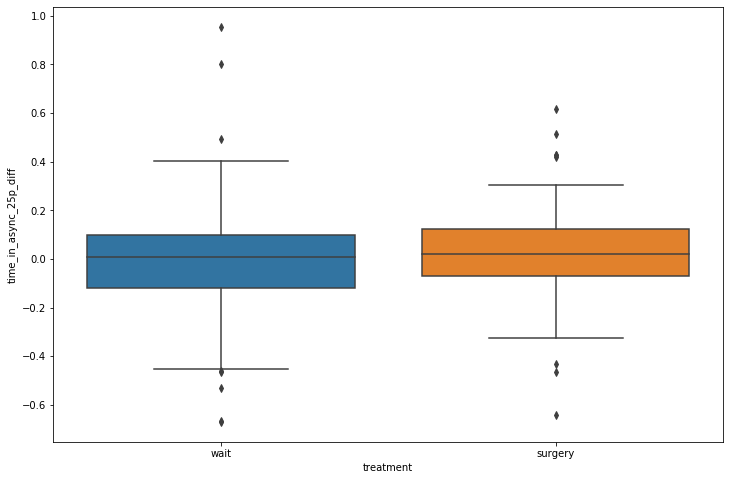

In [155]:
plt.figure(figsize=(12,8))
sns.boxplot(y='time_in_async_25p_diff', x='treatment', data=compare_df);

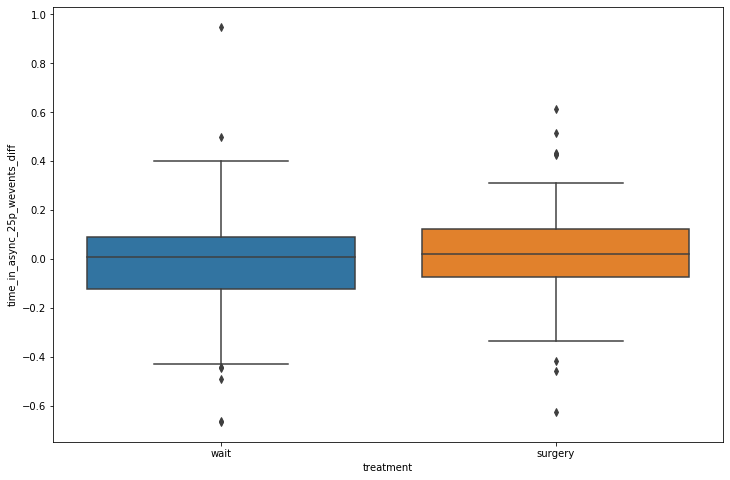

In [144]:
plt.figure(figsize=(12,8))
sns.boxplot(y='time_in_async_25p_wevents_diff', x='treatment', data=compare_df);

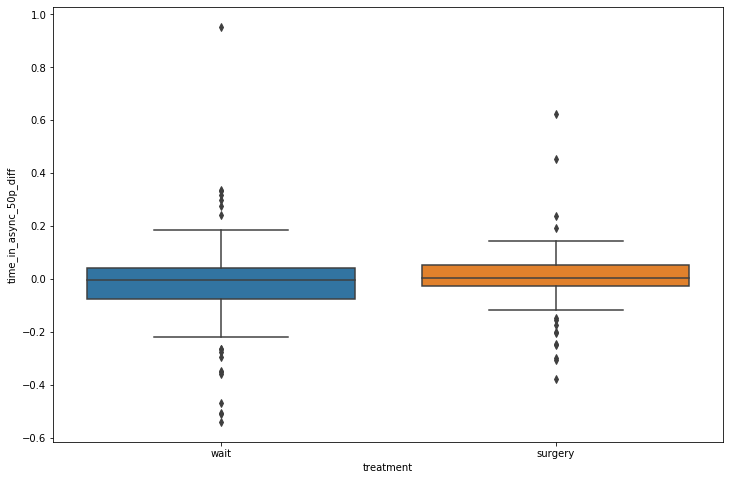

In [133]:
plt.figure(figsize=(12,8))
sns.boxplot(y='time_in_async_50p_diff', x='treatment', data=compare_df)

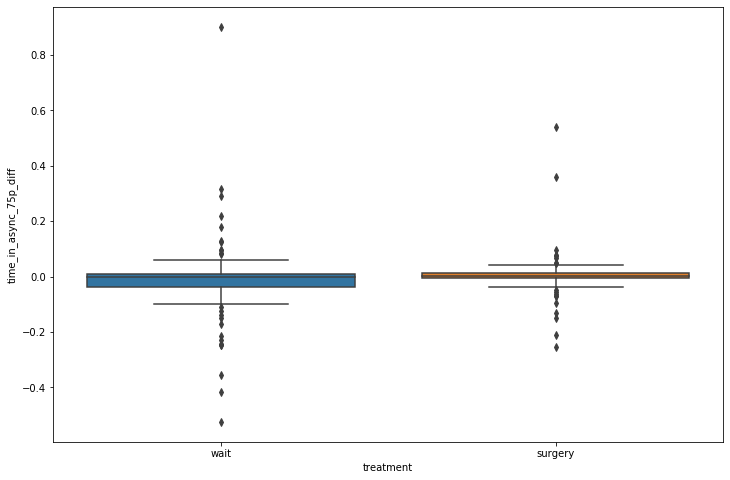

In [134]:
plt.figure(figsize=(12,8))
sns.boxplot(y='time_in_async_75p_diff', x='treatment', data=compare_df);

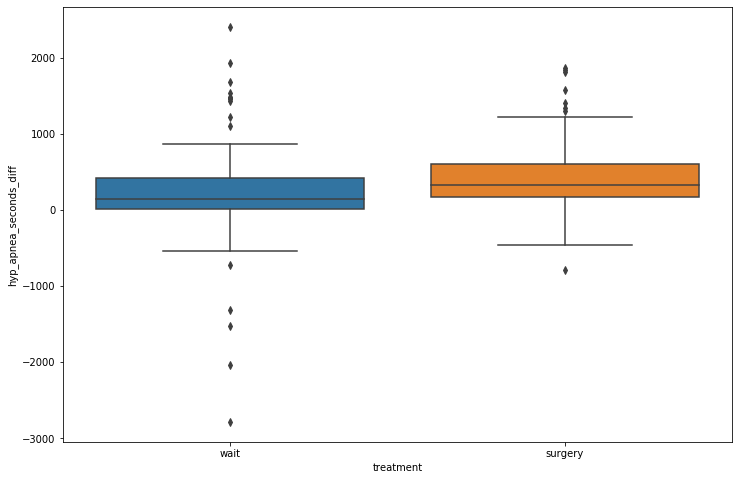

In [135]:
plt.figure(figsize=(12,8))
sns.boxplot(y='hyp_apnea_seconds_diff', x='treatment', data=compare_df);